# RNN - LSTM
Recurrent Neural Networks (RNN) using Long Short-Term Memory (LSTM)

# Data

In [2]:
import os
import glob
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the directory path
directory_path = "../data"

# Get the list of all files in the directory
files = os.listdir(directory_path)

# Filter to grab only the files (not directories)
files = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]

In [3]:
train = files[0:7]      # 2011 -> 2017
validation = files[7:8] # 2018
test = files[8:9]       # 2019

print("Training data:\t", train)
print("Validation data:", validation)
print("Testing data:\t", test)

Training data:	 ['All_Traffic 2011.csv', 'All_Traffic 2012.csv', 'All_Traffic 2013.csv', 'All_Traffic 2014.csv', 'All_Traffic 2015.csv', 'All_Traffic 2016.csv', 'All_Traffic 2017.csv']
Validation data: ['All_Traffic 2018.csv']
Testing data:	 ['All_Traffic 2019.csv']


In [4]:
x_train_All_Traffic = []
y_train_All_Traffic = []
x_test_All_Traffic = []
y_test_All_Traffic = []
x_validation_All_Traffic = []
y_validation_All_Traffic = []

# Process the training files
for file in train:
    # Read the CSV file
    one_year_data_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_All_Traffic = one_year_data_All_Traffic.drop(columns=['log_carloads'], inplace=False)
    y_All_Traffic = one_year_data_All_Traffic['log_carloads']
    
    # Append data to training lists
    x_train_All_Traffic.append(x_All_Traffic)
    y_train_All_Traffic.append(y_All_Traffic)

# Process the testing file
for file in test:
    # Read the CSV file
    one_year_data_test_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_test_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_test_All_Traffic1 = one_year_data_test_All_Traffic.drop(columns=['log_carloads'], inplace=False)
    y_test_All_Traffic1 = one_year_data_test_All_Traffic['log_carloads']
    
    # Append data to testing lists
    x_test_All_Traffic.append(x_test_All_Traffic1)
    y_test_All_Traffic.append(y_test_All_Traffic1)

# Process the validation file
for file in validation:
   # Read the CSV file
   one_year_data_validation_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
   
   # Drop rows with missing values
   one_year_data_validation_All_Traffic.dropna(inplace=True)
   
   # Split into features and target
   x_validation_All_Traffic1 = one_year_data_validation_All_Traffic.drop(columns=['log_carloads','BEA_origin','BEA_dest'], inplace=False)
   y_validation_All_Traffic1 = one_year_data_validation_All_Traffic['log_carloads']
   
   # Append data to validation lists
   x_validation_All_Traffic.append(x_validation_All_Traffic1)
   y_validation_All_Traffic.append(y_validation_All_Traffic1)

# Concatenate all the data into DataFrames
x_train_All_Traffic = pd.concat(x_train_All_Traffic)
y_train_All_Traffic = pd.concat(y_train_All_Traffic)
x_test_All_Traffic = pd.concat(x_test_All_Traffic)
y_test_All_Traffic = pd.concat(y_test_All_Traffic)
x_validation_All_Traffic = pd.concat(x_validation_All_Traffic)
y_validation_All_Traffic = pd.concat(y_validation_All_Traffic)

print(x_train_All_Traffic[0:9])

# save column names of x_train_All_Traffic
column_names = x_train_All_Traffic.columns
column_names_begin = column_names[0:1]
column_names_end = column_names[3:]
column_names_orig = list(column_names_begin.append(column_names_end))

# One-hot encode the categorical features
# encoder = OneHotEncoder(sparse=False, drop=None)
encoder = OneHotEncoder(drop=None)
x_train_All_Traffic_encoded = encoder.fit_transform(x_train_All_Traffic.iloc[:,1:3])
x_test_All_Traffic_encoded = encoder.transform(x_test_All_Traffic.iloc[:,1:3])
# extra_columns=len(x_train_All_Traffic_encoded[0])
extra_columns = x_train_All_Traffic_encoded[0].shape[0]
column_names = column_names_orig + ['encoded' + str(i) for i in range(extra_columns)]

# get rid of columns that were encoded
x_train_All_Traffic = x_train_All_Traffic.drop(columns=['BEA_origin','BEA_dest'], inplace=False)
x_test_All_Traffic = x_test_All_Traffic.drop(columns=['BEA_origin','BEA_dest'], inplace=False)

# Scaling the data
scaler = StandardScaler()
x_train_All_Traffic_scaled = scaler.fit_transform(x_train_All_Traffic)
x_test_All_Traffic_scaled = scaler.transform(x_test_All_Traffic)
x_validation_All_Traffic_scaled = scaler.transform(x_validation_All_Traffic)

# now add encoded data to the scaled data
x_train_All_Traffic = pd.concat([pd.DataFrame(x_train_All_Traffic_scaled), pd.DataFrame(x_train_All_Traffic_encoded)], axis=1)
x_test_All_Traffic = pd.concat([pd.DataFrame(x_test_All_Traffic_scaled), pd.DataFrame(x_test_All_Traffic_encoded)], axis=1)

# add column names to first 21 columns of x_train_All_Traffic and x_test_All_Traffic
x_train_All_Traffic.columns = column_names
x_test_All_Traffic.columns = column_names

   Average_Mileage  BEA_origin  BEA_dest  Population_origin  Population_dest  \
0         3.912023          10        10          18.974292        18.974292   
1         4.522430          10        11          18.974292         1.100462   
2         5.267321          10        13          18.974292         7.610982   
3         5.793802          10        20          18.974292         0.572526   
4         6.568714          10        28          18.974292         0.626198   
5         6.734454          10        29          18.974292         1.838462   
6         6.943499          10        31          18.974292         2.049325   
7         6.528557          10        40          18.974292         5.012703   
8         5.949249          10        48          18.974292         1.302836   

   Agriculture_forestry_fishing_and_hunting_origin  Construction_origin  \
0                                        13.689975            17.485232   
1                                        13.68997

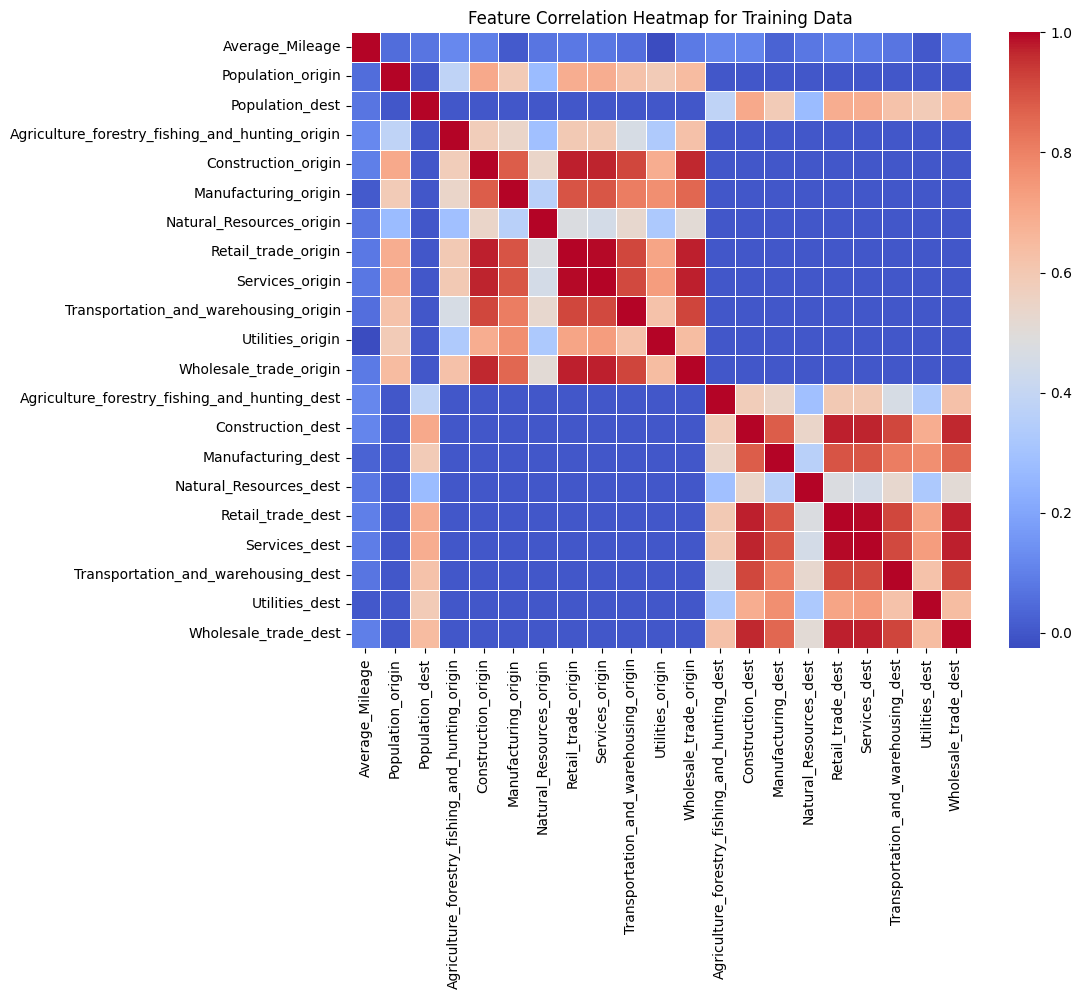

In [5]:
import seaborn as sns
#get correlations of each non-encoded features in dataset
#correlation_matrix = x_train_All_Traffic_scaled.corr()
x_train_All_Traffic_scaled_pd=pd.DataFrame(x_train_All_Traffic_scaled)
x_train_All_Traffic_scaled_pd.columns = column_names_orig
correlation_matrix = x_train_All_Traffic_scaled_pd.corr()
#correlation_matrix = x_train_All_Traffic.corr()

# Generate the heatmap without numbers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Display the heatmap
plt.title("Feature Correlation Heatmap for Training Data")
plt.show()

# Preprocessor

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical and categorical features
numerical_features = [
    'Agriculture_forestry_fishing_and_hunting_origin', 'Agriculture_forestry_fishing_and_hunting_dest',
    'Construction_origin', 'Construction_dest',
    'Manufacturing_origin', 'Manufacturing_dest',
    'Retail_trade_origin', 'Retail_trade_dest',
    'Services_origin', 'Services_dest',
    'Population_origin', 'Population_dest'
]
categorical_features = ['BEA_origin', 'BEA_dest']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply the preprocessing pipeline
def preprocess_data(files, directory_path, preprocessor, target_column='log_carloads', fit=False):
    X, y = [], []
    for file in files:
        # Load and clean the data
        data = pd.read_csv(os.path.join(directory_path, file)).dropna()
        
        # Split features and target
        y.append(data[target_column])
        X.append(data.drop(columns=[target_column]))
    
    # Concatenate yearly data
    X = pd.concat(X)
    y = pd.concat(y)
    
    # Fit or transform using the preprocessor
    if fit:
        X_transformed = preprocessor.fit_transform(X)
    else:
        X_transformed = preprocessor.transform(X)
    
    return X_transformed, y

# Fit the preprocessor on the training data
x_train, y_train = preprocess_data(train, directory_path, preprocessor, fit=True)

# Use the fitted preprocessor to transform validation and test data
x_validation, y_validation = preprocess_data(validation, directory_path, preprocessor, fit=False)
x_test, y_test = preprocess_data(test, directory_path, preprocessor, fit=False)


# LSTM Model

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

ModuleNotFoundError: No module named 'torch'

In [55]:
# Hyperparameters
input_size = x_train.shape[1]  # Number of features
hidden_size = 128  # Number of LSTM units
num_layers = 2  # Number of LSTM layers
output_size = 1  # Single target variable
learning_rate = 0.001
batch_size = 64
num_epochs = 100

In [56]:
from scipy.sparse import issparse

def prepare_dataloader(X, y, batch_size):
    """
    Prepare a PyTorch DataLoader from features and target data.
    
    Args:
        X: Feature array (can be sparse).
        y: Target array.
        batch_size: Batch size for the DataLoader.

    Returns:
        DataLoader object.
    """
    # Convert sparse matrix to dense if needed
    if issparse(X):
        X = X.todense()  # Convert sparse matrix to dense
        X = np.array(X)  # Ensure it's a NumPy array

    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y.values if hasattr(y, 'values') else y, dtype=torch.float32)
    
    dataset = TensorDataset(X_tensor, y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    return dataloader

# Prepare DataLoaders
train_loader = prepare_dataloader(x_train, y_train, batch_size)
val_loader = prepare_dataloader(x_validation, y_validation, batch_size)
test_loader = prepare_dataloader(x_test, y_test, batch_size)

In [57]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden and cell states with zeros
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)

        # LSTM forward pass
        out, _ = self.lstm(x, (h0, c0))

        # Pass the output of the last time step to the fully connected layer
        out = self.fc(out[:, -1, :])
        return out

In [58]:
# Initialize the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Initialize lists to collect data
train_losses = []
val_losses = []
test_losses = []
test_r2_scores = []
test_r2_scores_adjusted = []

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model(X_batch.unsqueeze(1))  # Add sequence dimension
        loss = criterion(outputs.squeeze(), y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)  # Collect train loss

    # Validation Loop
    model.eval()
    val_loss = 0.0
    val_predictions = []
    val_targets = []

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch.unsqueeze(1))
            loss = criterion(outputs.squeeze(), y_batch)

            val_loss += loss.item() * X_batch.size(0)
            
            # Collect predictions and targets for R^2 calculation
            val_predictions.extend(outputs.squeeze().cpu().numpy())
            val_targets.extend(y_batch.cpu().numpy())

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)  # Collect validation loss
    
    val_r2 = r2_score(val_targets, val_predictions)

    # Test Loop (optional, if you want to monitor during training)
    test_loss = 0.0
    test_predictions = []
    test_targets = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch.unsqueeze(1))
            test_loss += criterion(outputs.squeeze(), y_batch).item() * X_batch.size(0)

            # Collect predictions and targets for R^2 calculation
            test_predictions.extend(outputs.squeeze().cpu().numpy())
            test_targets.extend(y_batch.cpu().numpy())

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)  # Collect test loss

    # Calculate R^2 and Adjusted R^2
    test_r2 = r2_score(test_targets, test_predictions)
    test_r2_scores.append(test_r2)  # Collect test R^2 score

    n = len(test_targets)  # Number of samples
    k = x_test.shape[1]    # Number of predictors (features)
    test_r2_adjusted = 1 - ((1 - test_r2) * (n - 1)) / (n - k - 1)
    test_r2_scores_adjusted.append(test_r2_adjusted)

    # Print metrics for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
          f"Val R^2: {val_r2:.4f}, Test Loss: {test_loss:.4f}, Test R^2: {test_r2:.4f}, Adjusted Test R^2: {test_r2_adjusted:.4f}")

Epoch [1/100], Train Loss: 14.8979, Val Loss: 9.1882, Val R^2: 0.4074, Test R^2: 0.3632
Epoch [2/100], Train Loss: 7.9882, Val Loss: 8.1809, Val R^2: 0.4724, Test R^2: 0.4094
Epoch [3/100], Train Loss: 7.6065, Val Loss: 7.7806, Val R^2: 0.4982, Test R^2: 0.4429
Epoch [4/100], Train Loss: 7.3093, Val Loss: 7.4022, Val R^2: 0.5226, Test R^2: 0.4653
Epoch [5/100], Train Loss: 6.8488, Val Loss: 6.8739, Val R^2: 0.5567, Test R^2: 0.5035
Epoch [6/100], Train Loss: 6.2772, Val Loss: 6.5822, Val R^2: 0.5755, Test R^2: 0.5047
Epoch [7/100], Train Loss: 5.6819, Val Loss: 5.7465, Val R^2: 0.6294, Test R^2: 0.5603
Epoch [8/100], Train Loss: 5.1890, Val Loss: 5.2176, Val R^2: 0.6635, Test R^2: 0.6023
Epoch [9/100], Train Loss: 4.8737, Val Loss: 4.9413, Val R^2: 0.6813, Test R^2: 0.6125
Epoch [10/100], Train Loss: 4.5970, Val Loss: 4.6523, Val R^2: 0.7000, Test R^2: 0.6308
Epoch [11/100], Train Loss: 4.3760, Val Loss: 4.5048, Val R^2: 0.7095, Test R^2: 0.6499
Epoch [12/100], Train Loss: 4.1641, Val 

In [60]:
# Evaluate on test data
model.eval()
test_loss = 0.0
y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch.unsqueeze(1))
        test_loss += criterion(outputs.squeeze(), y_batch).item() * X_batch.size(0)
        y_pred.extend(outputs.squeeze().cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 3.9728


In [61]:
# Evaluate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = np.array(y_pred)
y_true = np.array(y_true)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Test MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")

Test MSE: 3.9728, MAE: 1.2598, R^2: 0.7314


In [62]:
import matplotlib.pyplot as plt

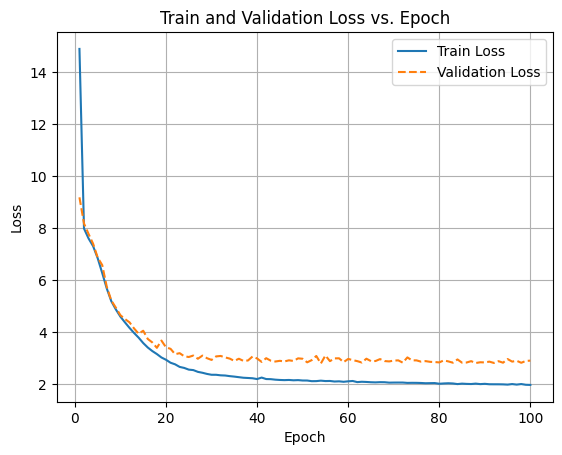

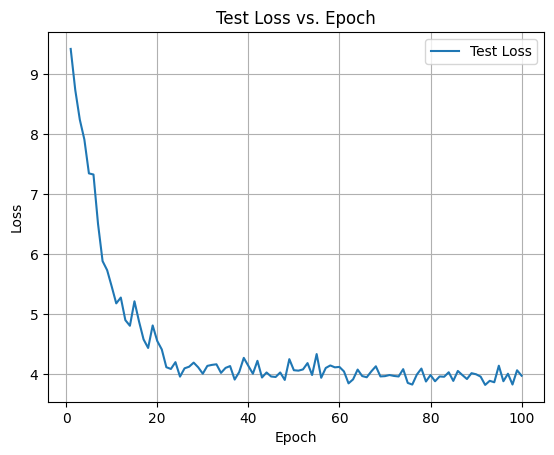

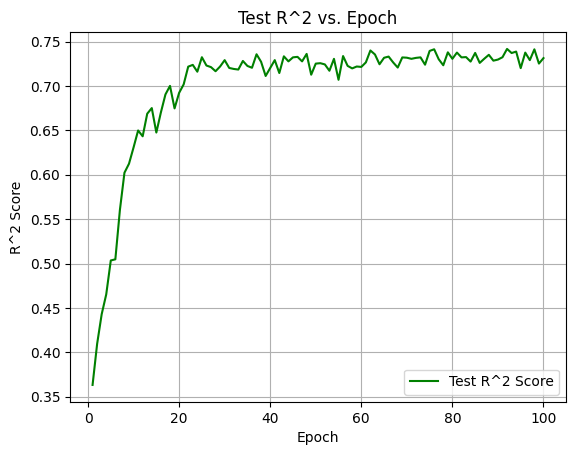

In [ ]:
# Plot Train Loss vs Epoch
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train and Validation Loss vs. Epoch")
plt.legend()
plt.grid()
plt.show()

# Plot Test Loss vs Epoch
plt.figure()
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Test Loss vs. Epoch")
plt.legend()
plt.grid()
plt.show()

# Plot Test R^2 vs Epoch
plt.figure()
plt.plot(range(1, num_epochs + 1), test_r2_scores, label="Test R^2 Score", color='red', linestyle="--")
plt.plot(range(1, num_epochs + 1), test_r2_scores_adjusted, label="Adjusted Test R^2 Score", color='green')
plt.xlabel("Epoch")
plt.ylabel("R^2 Score")
plt.title("Test R^2 vs. Epoch")
plt.legend()
plt.grid()
plt.show()